# Data Exploration 2 Assignment

## Imports and Connection

In [59]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats.mstats import winsorize
import seaborn as sns
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [60]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

exams_df = pd.read_sql_query('select * from studentsperformance', con=engine)

engine.dispose()

## Understanding the Data

In [61]:
exams_df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [62]:
exams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [63]:
exams_df.describe(include=['O'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [64]:
exams_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [65]:
exams_df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [66]:
exams_df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [67]:
exams_df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [68]:
exams_df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [69]:
exams_df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [70]:
exams_df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [71]:
print('Gender Categories: {}'.format(exams_df['gender'].unique()))
print('\n')
print('Race/Ethnicity Categories: {}'.format(exams_df['race/ethnicity'].unique()))
print('\n')
print('Parental Level of Education Categories: {}'.format(exams_df['parental level of education'].unique()))
print('\n')
print('Lunch Categories: {}'.format(exams_df['lunch'].unique()))
print('\n')
print('Test Preparation Course Categories: {}'.format(exams_df['test preparation course'].unique()))

Gender Categories: ['female' 'male']


Race/Ethnicity Categories: ['group B' 'group C' 'group A' 'group D' 'group E']


Parental Level of Education Categories: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Lunch Categories: ['standard' 'free/reduced']


Test Preparation Course Categories: ['none' 'completed']


**Notes:** There are no missing values, yay! Gender, race/ethnicity, parental level of education, lunch, test preparation course are all categorical. Math score, reading score, writing score are continuous. 

## 1.) Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

## Test by Grouping

In [77]:
exams_df.groupby("gender").mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [16]:
exams_df.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [17]:
exams_df.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


## Test Visually

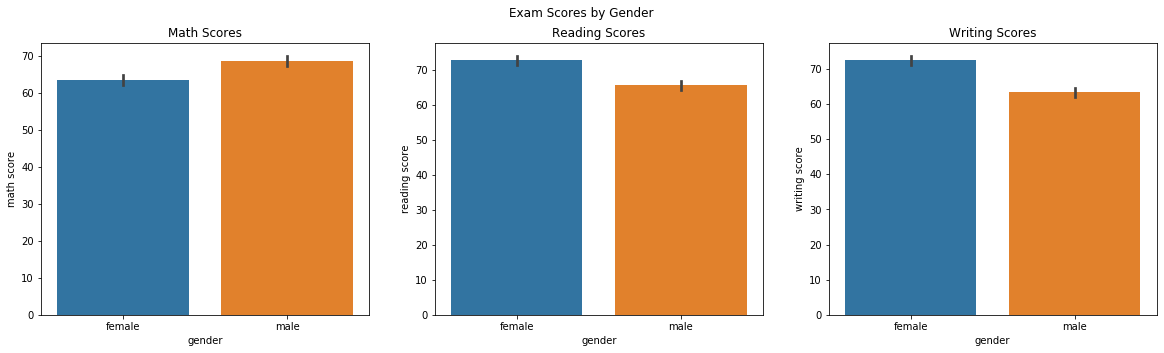

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(exams_df['gender'], exams_df['math score'])
plt.title('Math Scores')

plt.subplot(1,3,2)
sns.barplot(exams_df['gender'], exams_df['reading score'])
plt.title('Reading Scores')

plt.subplot(1,3,3)
sns.barplot(exams_df['gender'], exams_df['writing score'])
plt.title('Writing Scores')

plt.suptitle('Exam Scores by Gender')
plt.show()

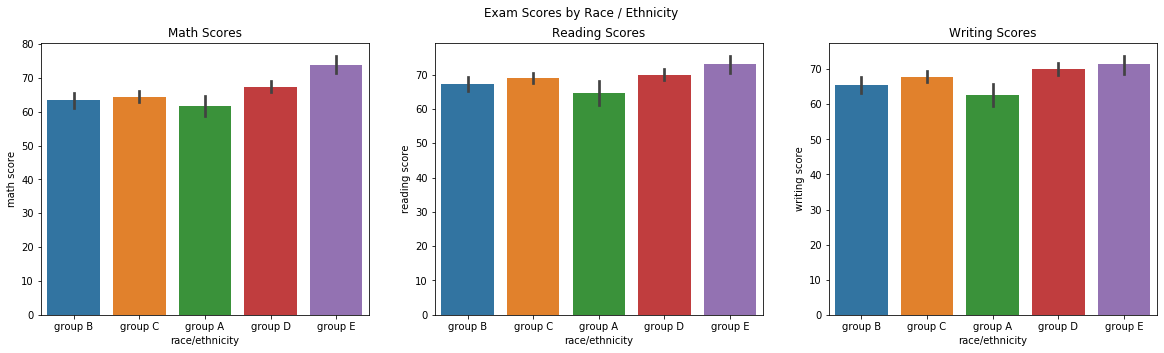

In [19]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(exams_df['race/ethnicity'], exams_df['math score'])
plt.title('Math Scores')

plt.subplot(1,3,2)
sns.barplot(exams_df['race/ethnicity'], exams_df['reading score'])
plt.title('Reading Scores')

plt.subplot(1,3,3)
sns.barplot(exams_df['race/ethnicity'], exams_df['writing score'])
plt.title('Writing Scores')

plt.suptitle('Exam Scores by Race / Ethnicity')
plt.show()

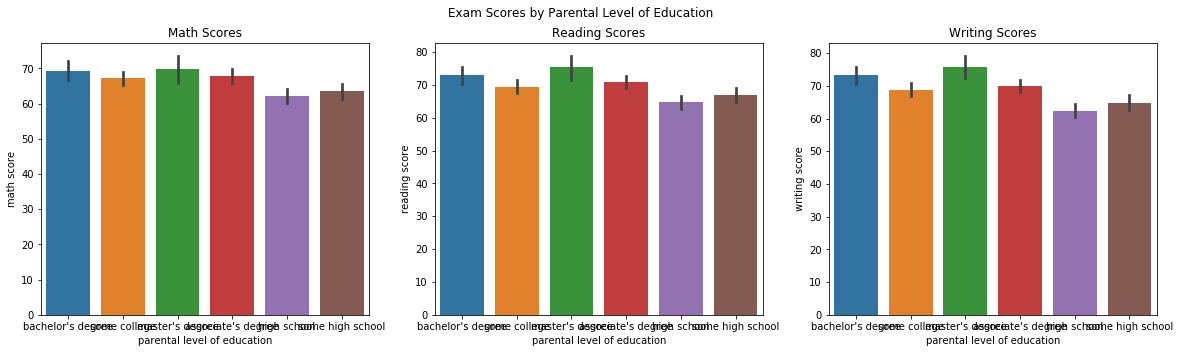

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(exams_df['parental level of education'], exams_df['math score'])
plt.title('Math Scores')

plt.subplot(1,3,2)
sns.barplot(exams_df['parental level of education'], exams_df['reading score'])
plt.title('Reading Scores')

plt.subplot(1,3,3)
sns.barplot(exams_df['parental level of education'], exams_df['writing score'])
plt.title('Writing Scores')

plt.suptitle('Exam Scores by Parental Level of Education')
plt.show()

## Test Statistically

In [23]:
gender_list = exams_df['gender'].unique()
race_ethnicity_list = exams_df['race/ethnicity'].unique()
parental_education_list = exams_df['parental level of education'].unique()

grouped_gender_df = exams_df.groupby('gender')
grouped_race_ethnicity_df = exams_df.groupby('race/ethnicity')
grouped_parental_education_df = exams_df.groupby('parental level of education')

for variable in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('{} comparison for variable: {}'.format('Gender', variable))
    print('------------------------------------------------')
    for i in range(0, len(gender_list)):
        for j in range(i+1, len(gender_list)):
            print('T test between groups {0} and {1}: '.format(gender_list[i], gender_list[j]))
            print(stats.ttest_ind(
                exams_df.loc[exams_df['gender']==gender_list[i],[variable]], 
                exams_df.loc[exams_df['gender']==gender_list[j],[variable]]))

for variable in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('{} comparison for variable: {}'.format('Race / Ethnicity', variable))
    print('------------------------------------------------')
    for i in range(0, len(race_ethnicity_list)):
        for j in range(i+1, len(race_ethnicity_list)):
            print('T test between groups {0} and {1}: '.format(race_ethnicity_list[i], race_ethnicity_list[j]))
            print(stats.ttest_ind(
                exams_df.loc[exams_df['race/ethnicity']==race_ethnicity_list[i],[variable]], 
                exams_df.loc[exams_df['race/ethnicity']==race_ethnicity_list[j],[variable]]))
            
for variable in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('{} comparison for variable: {}'.format('Parental Education', variable))
    print('------------------------------------------------')
    for i in range(0, len(parental_education_list)):
        for j in range(i+1, len(parental_education_list)):
            print('T test between groups {0} and {1}: '.format(parental_education_list[i], parental_education_list[j]))
            print(stats.ttest_ind(
                exams_df.loc[exams_df['parental level of education']==parental_education_list[i],[variable]], 
                exams_df.loc[exams_df['parental level of education']==parental_education_list[j],[variable]]))

------------------------------------------------
Gender comparison for variable: math score
------------------------------------------------
T test between groups female and male: 
Ttest_indResult(statistic=array([-5.38324587]), pvalue=array([9.12018555e-08]))
------------------------------------------------
Gender comparison for variable: reading score
------------------------------------------------
T test between groups female and male: 
Ttest_indResult(statistic=array([7.95930801]), pvalue=array([4.68053874e-15]))
------------------------------------------------
Gender comparison for variable: writing score
------------------------------------------------
T test between groups female and male: 
Ttest_indResult(statistic=array([9.97955791]), pvalue=array([2.01987771e-22]))
------------------------------------------------
Race / Ethnicity comparison for variable: math score
------------------------------------------------
T test between groups group B and group C: 
Ttest_indResult(st

### Conclusion 

We can see there are significant differences with multiple factors both visually and statistically. 

## 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [78]:
exams_df.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


## Test Visually

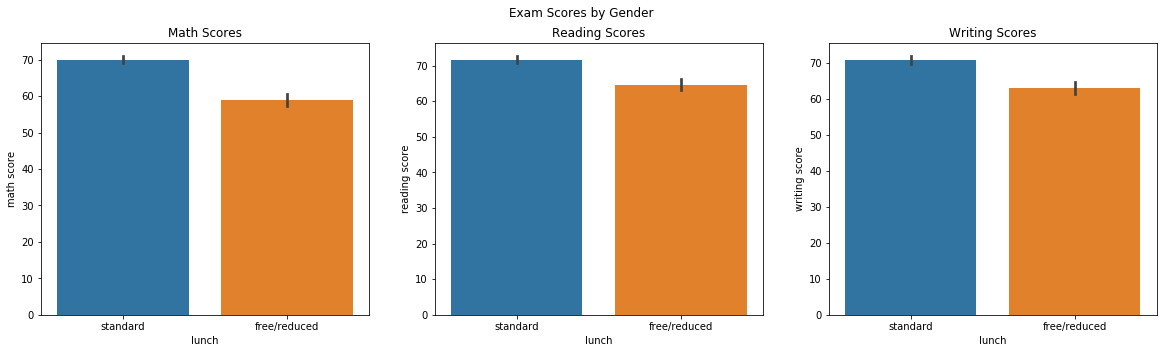

In [25]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(exams_df['lunch'], exams_df['math score'])
plt.title('Math Scores')

plt.subplot(1,3,2)
sns.barplot(exams_df['lunch'], exams_df['reading score'])
plt.title('Reading Scores')

plt.subplot(1,3,3)
sns.barplot(exams_df['lunch'], exams_df['writing score'])
plt.title('Writing Scores')

plt.suptitle('Exam Scores by Gender')
plt.show()

## Test Statistically

In [26]:
lunch_list = exams_df['lunch'].unique()

grouped_lunch_df = exams_df.groupby('lunch')

for variable in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('{} comparison for variable: {}'.format('Lunch', variable))
    print('------------------------------------------------')
    for i in range(0, len(lunch_list)):
        for j in range(i+1, len(lunch_list)):
            print('T test between groups {0} and {1}: '.format(lunch_list[i], lunch_list[j]))
            print(stats.ttest_ind(
                exams_df.loc[exams_df['lunch']==lunch_list[i],[variable]], 
                exams_df.loc[exams_df['lunch']==lunch_list[j],[variable]]))

------------------------------------------------
Lunch comparison for variable: math score
------------------------------------------------
T test between groups standard and free/reduced: 
Ttest_indResult(statistic=array([11.83718047]), pvalue=array([2.4131956e-30]))
------------------------------------------------
Lunch comparison for variable: reading score
------------------------------------------------
T test between groups standard and free/reduced: 
Ttest_indResult(statistic=array([7.45105647]), pvalue=array([2.00279665e-13]))
------------------------------------------------
Lunch comparison for variable: writing score
------------------------------------------------
T test between groups standard and free/reduced: 
Ttest_indResult(statistic=array([8.0097842]), pvalue=array([3.18618958e-15]))


### Conclusion

There is a significant difference in the test scores by lunch type. Likely the families that are not on free/reduced lunch are more involved, are able to provide greater resources for their children (like private tutoring), etc. 

## 3. Does the test preparation course seem to have an effect on the exam performances?

## Test Visually

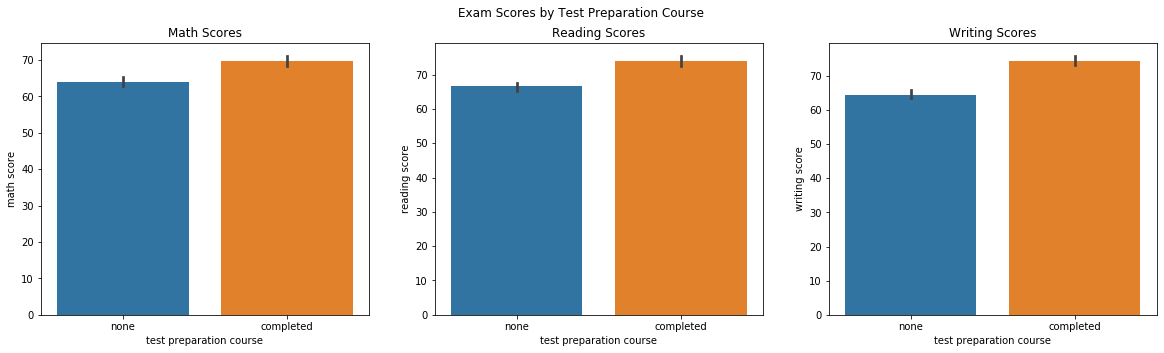

In [31]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(exams_df['test preparation course'], exams_df['math score'])
plt.title('Math Scores')

plt.subplot(1,3,2)
sns.barplot(exams_df['test preparation course'], exams_df['reading score'])
plt.title('Reading Scores')

plt.subplot(1,3,3)
sns.barplot(exams_df['test preparation course'], exams_df['writing score'])
plt.title('Writing Scores')

plt.suptitle('Exam Scores by Test Preparation Course')
plt.show()

In [56]:
exams_df.groupby(['test preparation course']).mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


## Conclusion

The test prep does seem to have an effect on exam performances. 

## 4. Which 2 exam scores are most correlated with each other?

In [43]:
exams_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


## Conclusion

Reading and Writing have the strongest correlation. 